In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
import random
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [3]:
#Reading in the dataframes with info about labels for every picture

data = pd.read_csv('data/Data_Entry_2017.csv')
bbox = pd.read_csv('data/BBox_List_2017.csv')
train_list = pd.read_csv('data/train_val_list.txt', sep="\n", header = None)
test_list = pd.read_csv('data/test_list.txt', sep="\n", header = None)

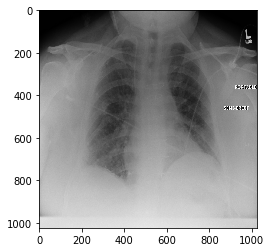

[[  1   1   1 ...   1   1   1]
 [  2   2   2 ...   1   1   1]
 [  2   2   1 ...   1   1   1]
 ...
 [130 230 220 ... 200 209 116]
 [136 241 231 ... 207 215 121]
 [ 65 115 109 ... 100 104  58]]


In [4]:
#Plotting and checking how opencv reads images in grayscale

first = os.path.join('data/images/images_001','images')
for img in os.listdir(first):
    img_array = cv2.imread(os.path.join(first, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    print(img_array)
    break

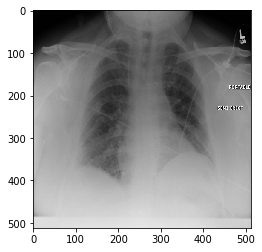

(512, 512)


In [5]:
#Checking resizing feature

IMG_SIZE = 512
dim = (IMG_SIZE, IMG_SIZE)
new_array = cv2.resize(img_array, dim)
plt.imshow(new_array, cmap = 'gray')
plt.show()
print(new_array.shape)

In [7]:
#Addding a column to a copy of the dataframe data. Columns contains 1 if label contains Cardiomegaly and 0 if not.  
    
cm = []
for n in np.arange(len(data['Finding Labels'])):
    if ('Cardiomegaly'in data['Finding Labels'][n]):
        cm.append(1)
    else:
        cm.append(0)



data2 = data.copy()
data2['Cardiomegaly'] = cm
data2 = data2[['Image Index', 'Finding Labels', 'Cardiomegaly']]

In [8]:
data2

,Image Index,Finding Labels,Cardiomegaly
0,00000001_000.png,Cardiomegaly,1
1,00000001_001.png,Cardiomegaly|Emphysema,1
2,00000001_002.png,Cardiomegaly|Effusion,1
3,00000002_000.png,No Finding,0
4,00000003_000.png,Hernia,0
...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,0
112116,00030802_000.png,No Finding,0
112117,00030803_000.png,No Finding,0
112118,00030804_000.png,No Finding,0


In [10]:
#Sampling 6000 samples from the training list of pictures without replacement.
#All the pictures would be too heavy for the computer and platform.


training = train_list[0].tolist()
training2 = random.sample(population = training, k = 6000)
d2 = data2[data2['Image Index'].isin(training2)]
d2

,Image Index,Finding Labels,Cardiomegaly
13,00000005_000.png,No Finding,0
21,00000006_000.png,No Finding,0
27,00000010_000.png,Infiltration,0
28,00000011_000.png,Effusion,0
179,00000035_001.png,No Finding,0
...,...,...,...
111880,00030650_005.png,Effusion|Infiltration|Mass,0
111967,00030697_000.png,Nodule,0
112014,00030733_002.png,Consolidation,0
112048,00030753_008.png,Effusion,0


In [11]:
#All image files

image_path = os.path.join('data','images')
for file in os.listdir(image_path):
    print(file)

.DS_Store
images_006
images_001
images_008
images_009
images_007
images_012
images_002
images_005
images_004
images_003
images_010
images_011


In [12]:
#Create the training data
#Goes through every file, fetching the relevant pictures, reading them as arrays.
#Final list contains entries that are of the form [image_array, label]

training_data = []

def create_training():
    imagefiles = ['images_001','images_002','images_003','images_004','images_005',
                 'images_006','images_007','images_008','images_009','images_010',
                 'images_011','images_012']
    image_path = os.path.join('data','images')
    for file in os.listdir(image_path):
        if (file != '.DS_Store'):
            collection = os.path.join(image_path, file)
            imagefile = os.path.join(collection,'images')
            for pic in os.listdir(imagefile):
                if (pic in training2):
                    img_array = cv2.imread(os.path.join(imagefile, pic), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, dim)
                    #print(new_array.shape)
                    label = d2[d2['Image Index'].str.contains(pic)].reset_index()['Cardiomegaly'][0]
                    training_data.append([new_array, label])
                    #training_pics.append(new_array)
                    #training_labels.append(label)

create_training()

In [13]:
#training_pics_np = np.empty((6000, 512, 512))
#for i in np.arange(len(training_pics)):
#    training_pics_np[i] = training_pics[i]

In [14]:
print(len(training_data))

6000


In [15]:
for sample in training_data:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [16]:
#Shuffle data

random.shuffle(training_data)

In [17]:
X = []
Y = []

In [18]:
#Resizing array

for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [19]:
#Saving arrays

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()